<a href="https://colab.research.google.com/github/Melanee-Melanee/My-Practice/blob/main/Vazan%20keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import mnist, fashion_mnist
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X=np.zeros((X_train.shape[0], 784))
for i in range(X_train.shape[0]):
  X[i]=X_train[i].flatten()

In [5]:
X = pd.DataFrame(X)
Y = pd.DataFrame(y_train)
X = X.sample(frac=0.25,
random_state=1400).reset_index(drop=True)
Y = Y.sample(frac=0.25,
random_state=1400).reset_index(drop=True)
df = X

In [6]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(df.values)

In [7]:
pca_df = pd.DataFrame(data = pca_results
, columns = ['pca_1', 'pca_2'])
pca_df['label'] = Y

<bound method Axes.legend of <matplotlib.axes._subplots.AxesSubplot object at 0x7f2dc484ae50>>

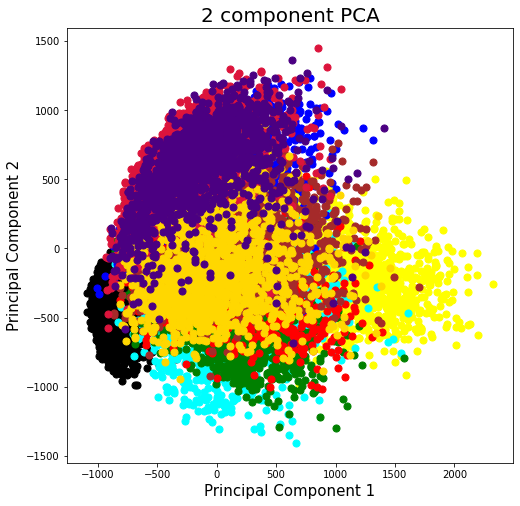

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2,3,4,5,6,7,8,9]
colors = ['r', 'g', 'b']
colors = dict(mcolors.BASE_COLORS,
**mcolors.CSS4_COLORS)
colors=['yellow', 'black', 'cyan', 'green', 'blue', 'red',
'brown','crimson', 'gold', 'indigo']
for target, color in zip(targets,colors):
  indicesToKeep = pca_df['label'] == target
  ax.scatter(pca_df.loc[indicesToKeep, 'pca_1']
  , pca_df.loc[indicesToKeep, 'pca_2']
  , c = color
  , s = 50)
ax.legend